# Machine Learning techniques: Classification

Once the clustering divided the MFIs in several groups I want to know if I can confirm these behaviours with some classification methods and check how accurate are my models to predict. I used a machine learning pipeline to detect which one had the best performance.

Index:

<a class="anchor" id="index"></a>

1. [Removing outliers ased in the clusters](#1)
2. [Stablishing train and test](#2)
3. [Machine Learning Pipeline](#3) 
4. [Split of the data without specifying train and test](#4)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

import sys
import os

from IPython.display import display
from sklearn.model_selection import train_test_split

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
data = pd.read_csv('/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/reduced_datasets/data_unsupervised.csv')
data.shape

(3661, 33)

In [48]:
data.head()

,Unnamed: 0,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,...,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women,cluster,Cluster
0,0,1st Valley Bank,2011,0.5013,85055980.0,4029479.0,77543.0,34.0,494.0,0.0478,...,0,0,0,1,0,0,1,1,0,0
1,1,1st Valley Bank,2012,0.7125,112791709.0,6231245.0,72351.0,35.0,532.0,0.0552,...,0,0,0,1,0,0,1,1,0,0
2,2,1st Valley Bank,2013,0.7414,116329302.0,10507132.0,47981.0,35.0,562.0,0.0903,...,0,0,0,1,0,0,1,1,0,0
3,3,1st Valley Bank,2014,0.6669,116423597.0,16537965.0,53388.0,38.0,666.0,0.1420,...,0,0,0,1,0,0,1,1,0,0
4,4,1st Valley Bank,2018,0.8426,132682781.0,11559835.0,48153.0,51.0,769.0,0.0872,...,0,0,0,1,0,0,1,1,0,0


In [49]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MFI Name                                                3661 non-null   object 
 1   Fiscal Year                                             3661 non-null   int64  
 2   Average loan balance per borrower / GNI per capita      3661 non-null   float64
 3   Gross Loan Portfolio                                    3661 non-null   float64
 4   Gross Loan Portfolio > Delinquency > One month or more  3661 non-null   float64
 5   Number of active borrowers                              3661 non-null   float64
 6   Offices                                                 3661 non-null   float64
 7   Personnel                                               3661 non-null   float64
 8   Portfolio at risk > 30 days           

In [51]:
data.drop(columns=['cluster'],axis=1,inplace=True)

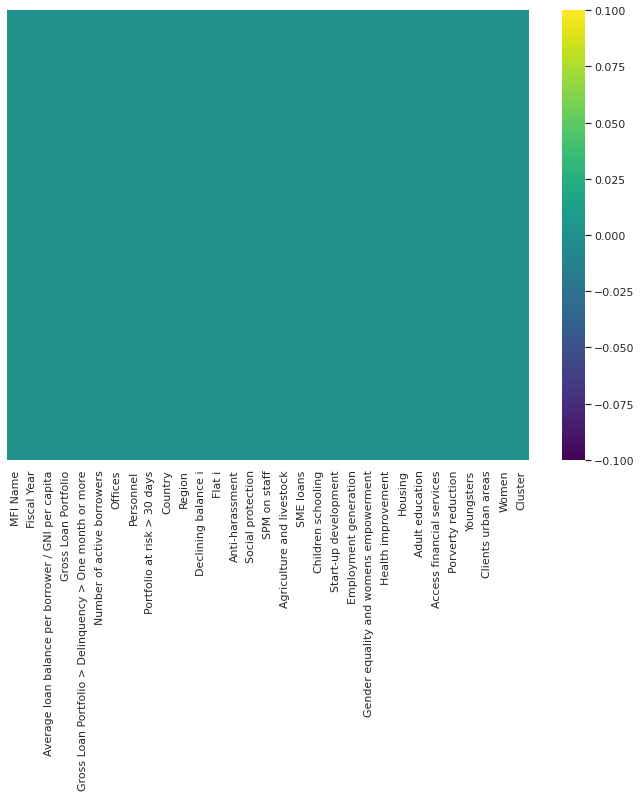

In [52]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

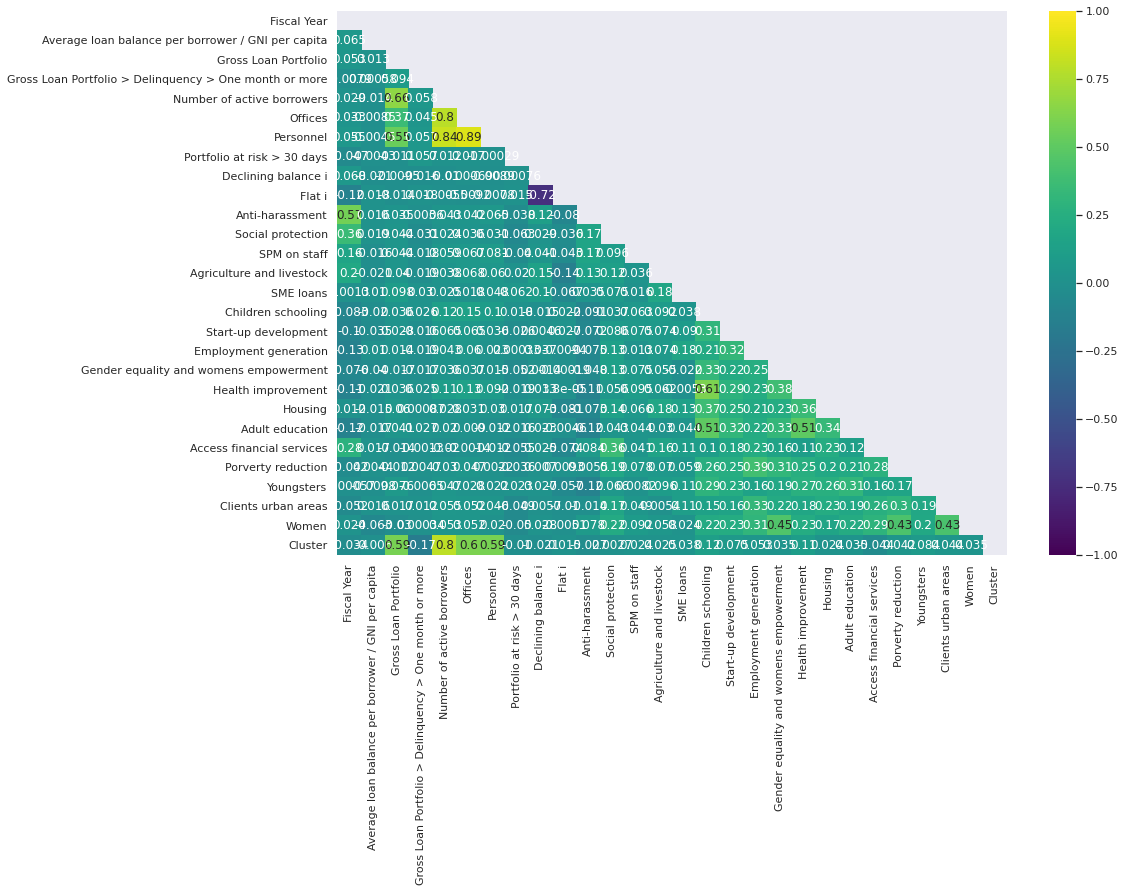

In [53]:
#I want to see how correlated are my variables now they are all together. There are pretty much variables 
#with high correlation!

from Functions_EDA import *
corrCoef(data)

## 1. Removing outliers based in the clusters
<a class="anchor" id="1"></a>

[^Index](#index)

When DBSCAN stablished the groups it spotted 4 outliers and was recognising for cluster number 2 only 7 MFIS. My goal is to remove those outliers and see what kind of MFIs are considered in group no.2.

In [54]:
#I am removing outliers grouped on cluster no. -1.

data.Cluster.value_counts()

 0    3625
 1      25
 2       7
-1       4
Name: Cluster, dtype: int64

In [55]:
data_clean = data[data['Cluster'] != -1]

In [56]:
data_clean.head()

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women,Cluster
0,1st Valley Bank,2011,0.5013,85055980.0,4029479.0,77543.0,34.0,494.0,0.0478,Philippines,...,0,0,0,0,1,0,0,1,1,0
1,1st Valley Bank,2012,0.7125,112791709.0,6231245.0,72351.0,35.0,532.0,0.0552,Philippines,...,0,0,0,0,1,0,0,1,1,0
2,1st Valley Bank,2013,0.7414,116329302.0,10507132.0,47981.0,35.0,562.0,0.0903,Philippines,...,0,0,0,0,1,0,0,1,1,0
3,1st Valley Bank,2014,0.6669,116423597.0,16537965.0,53388.0,38.0,666.0,0.1420,Philippines,...,0,0,0,0,1,0,0,1,1,0
4,1st Valley Bank,2018,0.8426,132682781.0,11559835.0,48153.0,51.0,769.0,0.0872,Philippines,...,0,0,0,0,1,0,0,1,1,0


In [57]:
data_clean.shape

(3657, 31)

In [58]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3657 entries, 0 to 3660
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MFI Name                                                3657 non-null   object 
 1   Fiscal Year                                             3657 non-null   int64  
 2   Average loan balance per borrower / GNI per capita      3657 non-null   float64
 3   Gross Loan Portfolio                                    3657 non-null   float64
 4   Gross Loan Portfolio > Delinquency > One month or more  3657 non-null   float64
 5   Number of active borrowers                              3657 non-null   float64
 6   Offices                                                 3657 non-null   float64
 7   Personnel                                               3657 non-null   float64
 8   Portfolio at risk > 30 days           

In [59]:
clusters = data_clean.copy()

**Which banks are from cluster 2?**

Seems in cluster no. 2 are only the records of VBSP bank from Vietnam. As this is only one MFI I will remove the values as doesn't allow me to get good results on ML.

In [60]:
cluster2 = clusters[clusters['Cluster'] == 2]
cluster2

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women,Cluster
3522,VBSP,2008,0.4992,3.017866e+09,7.920463e+06,6792978.0,610.0,7809.0,0.070948,Vietnam,...,1,1,0,1,0,1,1,1,1,2
3523,VBSP,2009,0.4954,3.929036e+09,7.920463e+06,7536960.0,677.0,8370.0,0.070948,Vietnam,...,1,1,0,1,1,1,1,1,1,2
3524,VBSP,2010,0.5115,4.588944e+09,7.920463e+06,8166287.0,681.0,8800.0,0.070948,Vietnam,...,1,1,0,1,1,1,1,1,1,2
3525,VBSP,2011,0.5312,4.932544e+09,7.920463e+06,6900000.0,677.0,8900.0,0.070948,Vietnam,...,1,1,1,1,0,1,1,1,1,2
3526,VBSP,2012,0.5723,5.468212e+09,7.920463e+06,7100000.0,63.0,8045.0,0.070948,Vietnam,...,1,1,1,1,0,1,1,1,1,2
3527,VBSP,2013,0.4673,5.773396e+09,6.234909e+07,7100000.0,678.0,9162.0,0.010800,Vietnam,...,1,1,1,1,0,1,1,1,1,2
3528,VBSP,2014,0.4899,6.052089e+09,7.920463e+06,7100000.0,678.0,9162.0,0.070948,Vietnam,...,1,1,1,1,0,1,1,1,1,2


In [61]:
#I am setting my dataset without this MFI.

study = clusters[clusters['Cluster'] != 2]

In [62]:
#And remove categorical variables such as MFI Name, Country and Region.

study.drop(columns=['MFI Name', 'Country', 'Region'],axis=1,inplace=True)

In [63]:
study.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 3660
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Fiscal Year                                             3650 non-null   int64  
 1   Average loan balance per borrower / GNI per capita      3650 non-null   float64
 2   Gross Loan Portfolio                                    3650 non-null   float64
 3   Gross Loan Portfolio > Delinquency > One month or more  3650 non-null   float64
 4   Number of active borrowers                              3650 non-null   float64
 5   Offices                                                 3650 non-null   float64
 6   Personnel                                               3650 non-null   float64
 7   Portfolio at risk > 30 days                             3650 non-null   float64
 8   Declining balance i                   

## 2. Stablishing train and test
<a class="anchor" id="2"></a>

[^Index](#index)

My idea is to set train and test based on a period time. Train will be set from 1999 to 2012 and test from 2012 to 2018. After that due to have very few values in one of the clusters I will do over-sample with SMOTE method.

In [64]:
#train: 1999-2012

train = study[study['Fiscal Year'] <= 2012]

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 0 to 3658
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Fiscal Year                                             1918 non-null   int64  
 1   Average loan balance per borrower / GNI per capita      1918 non-null   float64
 2   Gross Loan Portfolio                                    1918 non-null   float64
 3   Gross Loan Portfolio > Delinquency > One month or more  1918 non-null   float64
 4   Number of active borrowers                              1918 non-null   float64
 5   Offices                                                 1918 non-null   float64
 6   Personnel                                               1918 non-null   float64
 7   Portfolio at risk > 30 days                             1918 non-null   float64
 8   Declining balance i                   

In [66]:
#Define x and y values for train

X = train.iloc[:,1:26] 
y = train.Cluster

In [67]:
train.Cluster.value_counts()

0    1901
1      17
Name: Cluster, dtype: int64

In [69]:
#Over-sampling: SMOTE Method

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sma, y_sma = smote.fit_sample(X, y)

In [70]:
y_sma.value_counts()

1    1901
0    1901
Name: Cluster, dtype: int64

In [71]:
X_train, y_train = (X_sma,y_sma)

In [72]:
#test: 2012-2018

test = study[study['Fiscal Year'] > 2012]

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 2 to 3660
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Fiscal Year                                             1732 non-null   int64  
 1   Average loan balance per borrower / GNI per capita      1732 non-null   float64
 2   Gross Loan Portfolio                                    1732 non-null   float64
 3   Gross Loan Portfolio > Delinquency > One month or more  1732 non-null   float64
 4   Number of active borrowers                              1732 non-null   float64
 5   Offices                                                 1732 non-null   float64
 6   Personnel                                               1732 non-null   float64
 7   Portfolio at risk > 30 days                             1732 non-null   float64
 8   Declining balance i                   

In [74]:
#Define x and y values for test

X = test.iloc[:,1:26] 
y = test.Cluster

In [75]:
test.Cluster.value_counts()

0    1724
1       8
Name: Cluster, dtype: int64

In [77]:
#Over-sampling: SMOTE Method

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sme, y_sme = smote.fit_sample(X, y)

In [78]:
y_sme.value_counts()

1    1724
0    1724
Name: Cluster, dtype: int64

In [79]:
X_test, y_test = (X_sme,y_sme)

In [80]:
print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))


Shape of the Train data (X_train): (3802, 25)
Shape of the Train data (y_train): (3802,)

Shape of the Test data (X_test): (3448, 25)
Shape of the TARGET Test data (y_test): (3448,)


## 3. Machine Learning Pipeline

<a class="anchor" id="3"></a>

[^Index](#index)

In order to build the pipeline I used a function able to call 10 different machine learning techniques for classification and see which suits best my model.

In [81]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier())) 
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    return basedModels

In [82]:
def BasedModels(X_train, y_train,models):
     # Test options and evaluation metric
    num_folds = 10
    #num_folds =  k_folds
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Accuracy = %f (std = %f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [83]:
SEED = 7
np.random.seed(SEED)

In [84]:
models = GetBasedModel()
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('SVM', SVC(probability=True)),
 ('RF', RandomForestClassifier()),
 ('ET', ExtraTreesClassifier()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('NB', GaussianNB()),
 ('AB', AdaBoostClassifier()),
 ('GBM', GradientBoostingClassifier())]

In [85]:
names,results = BasedModels(X_train, y_train,models)

LR: Accuracy = 0.933454 (std = 0.026032)
KNN: Accuracy = 0.986592 (std = 0.009577)
CART: Accuracy = 0.999737 (std = 0.000789)
SVM: Accuracy = 0.985278 (std = 0.011094)
RF: Accuracy = 1.000000 (std = 0.000000)
ET: Accuracy = 0.999738 (std = 0.000787)
LDA: Accuracy = 0.999738 (std = 0.000787)
NB: Accuracy = 0.995529 (std = 0.004999)
AB: Accuracy = 1.000000 (std = 0.000000)
GBM: Accuracy = 0.999737 (std = 0.000789)


In [86]:
def ScoreDataFrame(names,results):
    """
    A function to append the results of the different models
    assessed and put them together in a DF

    """
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [87]:
def print_scoresClassification(model, X_train, y_train, X_test, y_test, train=True):
    from sklearn.model_selection import cross_validate

    scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
    
    if train:
        scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
        ypredTrain = model.predict(X_train)
        Acc_train = scores['test_acc'].mean()
        Precision_train = scores['test_prec_macro'].mean()
        Recall_train = scores['test_rec_macro'].mean()
        F1_train = scores['test_f1_macro'].mean()
        conf_matrix_train = confusion_matrix(y_train, ypredTrain)
    
        print("Train Results:\n===========================================")
        print(f"CV - Accuracy : {Acc_train:.4f}\n")
        print(f"CV -Precision: {Precision_train:.4f}\n")
        print(f"CV -Recall: {Recall_train:.4f}\n")
        print(f"CV -F1 score: {F1_train:.4f}\n")    
        print(f"Confusion_matrix:\n {conf_matrix_train}\n")    
        
    elif train==False:
        scores = cross_validate(model, X_test, y_test, cv=10, scoring=scoring)
        ypredtest = model.predict(X_test)
        Acc_test = scores['test_acc'].mean()
        Precision_test = scores['test_prec_macro'].mean()
        Recall_test = scores['test_rec_macro'].mean()
        F1_test = scores['test_f1_macro'].mean()
        conf_matrix_test = confusion_matrix(y_test, ypredtest)
    
        print("Test Results:\n===========================================")
        print(f"CV -Accuracy : {Acc_test:.4f}\n")
        print(f"CV -Precision: {Precision_test:.4f}\n")
        print(f"CV -Recall: {Recall_test:.4f}\n")
        print(f"CV -F1 score: {F1_test:.4f}\n")    
        print(f"Confusion_matrix:\n {conf_matrix_test}\n") 

In [88]:
def MetricsClas(models,X_train, y_train, X_test, y_test):
    for name, model in models:
        print('-*-'*25)
        print('Assessment of ', str(name), '\n')
        model_fit = model.fit(X_train, y_train)
        print_scoresClassification (model_fit, X_train, y_train, X_test, y_test, train=True)
        print_scoresClassification (model_fit, X_train, y_train, X_test, y_test, train=False)

In [89]:
Base_model = ScoreDataFrame(names,results)
Base_model.T

,0,1,2,3,4,5,6,7,8,9
Model,LR,KNN,CART,SVM,RF,ET,LDA,NB,AB,GBM
Score,0.9335,0.9866,0.9997,0.9853,1,0.9997,0.9997,0.9955,1,0.9997


In [90]:
MetricsClas(models,X_train, y_train, X_test, y_test)

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Assessment of  LR 

Train Results:
CV - Accuracy : 0.9335

CV -Precision: 0.9422

CV -Recall: 0.9335

CV -F1 score: 0.9330

Confusion_matrix:
 [[1646  255]
 [   0 1901]]

Test Results:
CV -Accuracy : 0.8489

CV -Precision: 0.8861

CV -Recall: 0.8488

CV -F1 score: 0.8441

Confusion_matrix:
 [[1399  325]
 [ 743  981]]

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Assessment of  KNN 

Train Results:
CV - Accuracy : 0.9866

CV -Precision: 0.9871

CV -Recall: 0.9866

CV -F1 score: 0.9866

Confusion_matrix:
 [[1861   40]
 [   0 1901]]

Test Results:
CV -Accuracy : 0.9814

CV -Precision: 0.9824

CV -Recall: 0.9815

CV -F1 score: 0.9814

Confusion_matrix:
 [[1655   69]
 [ 666 1058]]

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Assessment of  CART 

Train Results:
CV - Accuracy : 1.0000

CV -Precision: 1.0000

CV -Recall: 1.0000

CV -F1 score: 1.0000

Confu

## 4. Split of the data without specifying train and test
<a class="anchor" id="4"></a>

[^Index](#index)

My results seem to be quite good, but let's try to obtain results without specifying train and test splits.

Here I will be including labels 0,1 and 2 (the latter was removed for the first pipeline process)

In [92]:
df = data_clean.copy()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3657 entries, 0 to 3660
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MFI Name                                                3657 non-null   object 
 1   Fiscal Year                                             3657 non-null   int64  
 2   Average loan balance per borrower / GNI per capita      3657 non-null   float64
 3   Gross Loan Portfolio                                    3657 non-null   float64
 4   Gross Loan Portfolio > Delinquency > One month or more  3657 non-null   float64
 5   Number of active borrowers                              3657 non-null   float64
 6   Offices                                                 3657 non-null   float64
 7   Personnel                                               3657 non-null   float64
 8   Portfolio at risk > 30 days           

In [94]:
df.drop(columns=['MFI Name', 'Country', 'Region'],axis=1,inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3657 entries, 0 to 3660
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Fiscal Year                                             3657 non-null   int64  
 1   Average loan balance per borrower / GNI per capita      3657 non-null   float64
 2   Gross Loan Portfolio                                    3657 non-null   float64
 3   Gross Loan Portfolio > Delinquency > One month or more  3657 non-null   float64
 4   Number of active borrowers                              3657 non-null   float64
 5   Offices                                                 3657 non-null   float64
 6   Personnel                                               3657 non-null   float64
 7   Portfolio at risk > 30 days                             3657 non-null   float64
 8   Declining balance i                   

In [96]:
#Define x and y values for train

X = df.iloc[:,1:26] 
y = df.Cluster

In [97]:
#Let's see if I have imbalanced data

df.Cluster.value_counts()

0    3625
1      25
2       7
Name: Cluster, dtype: int64

In [99]:
#I will use SMOTE over-sampling method to balance the data

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)

In [100]:
y_sm.value_counts()

2    3625
1    3625
0    3625
Name: Cluster, dtype: int64

In [101]:
X_train, X_test, y_train, y_test =train_test_split(X_sm,y_sm,test_size=0.33,random_state=42)

In [102]:
print('Shape of the raw data (X): {}'.format (X_sm.shape))
print('Shape of the TARGET variable (y): {}'.format (y_sm.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (10875, 25)
Shape of the TARGET variable (y): (10875,)

Shape of the Train data (X_train): (7286, 25)
Shape of the Train data (y_train): (7286,)

Shape of the Test data (X_test): (3589, 25)
Shape of the TARGET Test data (y_test): (3589,)


In [103]:
models = GetBasedModel()
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('SVM', SVC(probability=True)),
 ('RF', RandomForestClassifier()),
 ('ET', ExtraTreesClassifier()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('NB', GaussianNB()),
 ('AB', AdaBoostClassifier()),
 ('GBM', GradientBoostingClassifier())]

In [104]:
names,results = BasedModels(X_train, y_train,models)

LR: Accuracy = 0.887178 (std = 0.010881)
KNN: Accuracy = 0.987921 (std = 0.004017)
CART: Accuracy = 0.999726 (std = 0.000549)
SVM: Accuracy = 0.984216 (std = 0.005034)
RF: Accuracy = 1.000000 (std = 0.000000)
ET: Accuracy = 0.999863 (std = 0.000412)
LDA: Accuracy = 0.999863 (std = 0.000412)
NB: Accuracy = 0.990805 (std = 0.003251)
AB: Accuracy = 0.999588 (std = 0.000629)
GBM: Accuracy = 0.999726 (std = 0.000549)


In [105]:
Base_model = ScoreDataFrame(names,results)
Base_model.T

,0,1,2,3,4,5,6,7,8,9
Model,LR,KNN,CART,SVM,RF,ET,LDA,NB,AB,GBM
Score,0.8872,0.9879,0.9997,0.9842,1,0.9999,0.9999,0.9908,0.9996,0.9997


In [106]:
MetricsClas(models,X_train, y_train, X_test, y_test)

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Assessment of  LR 

Train Results:
CV - Accuracy : 0.8872

CV -Precision: 0.9045

CV -Recall: 0.8873

CV -F1 score: 0.8807

Confusion_matrix:
 [[1603  588  241]
 [   4 2408    0]
 [   0    0 2442]]

Test Results:
CV -Accuracy : 0.8911

CV -Precision: 0.9094

CV -Recall: 0.8907

CV -F1 score: 0.8851

Confusion_matrix:
 [[ 790  291  112]
 [   0 1213    0]
 [   0    0 1183]]

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Assessment of  KNN 

Train Results:
CV - Accuracy : 0.9879

CV -Precision: 0.9883

CV -Recall: 0.9879

CV -F1 score: 0.9879

Confusion_matrix:
 [[2361   69    2]
 [   1 2411    0]
 [   0    0 2442]]

Test Results:
CV -Accuracy : 0.9844

CV -Precision: 0.9853

CV -Recall: 0.9844

CV -F1 score: 0.9845

Confusion_matrix:
 [[1140   52    1]
 [   1 1212    0]
 [   0    0 1183]]

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Assessment of  CART

Results to be more or less the same using both methods (specifying and not specifying years). On both cases the models giving the best results were Logistic Regression, KNN, SVM followed by LDA and Gaussian.